In [1]:
# Common imports
import numpy as np
import os
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import scikitplot as skplt
import warnings 
warnings.filterwarnings('ignore')

# To plot pretty figures

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


# KMEANS Clustering

In [2]:
from sklearn.datasets import make_blobs

blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)


In [3]:
X

array([[-2.69823941,  1.3454702 ],
       [-2.87459835,  1.8097575 ],
       [ 0.96077126,  1.17046777],
       ...,
       [-2.80303543,  2.72948115],
       [ 0.24057359,  2.40103109],
       [-2.63807768,  1.95621065]])

In [4]:
y

array([4, 2, 0, ..., 3, 0, 2])

In [5]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

Saving figure blobs_plot


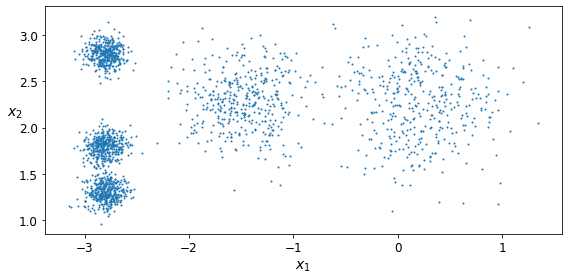

In [6]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
save_fig("blobs_plot")
plt.show()


# Clustering into 5 clusters

In [7]:
from sklearn.cluster import KMeans

k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

In [8]:
y_pred

array([4, 0, 1, ..., 2, 1, 0])

In [9]:
kmeans.labels_

array([4, 0, 1, ..., 2, 1, 0])

In [10]:
y_pred is kmeans.labels_

True

In [11]:
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

In [12]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)


array([1, 1, 2, 2])

# Decision Boundaries using Voronoi diagram

In [13]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)


Saving figure voronoi_plot


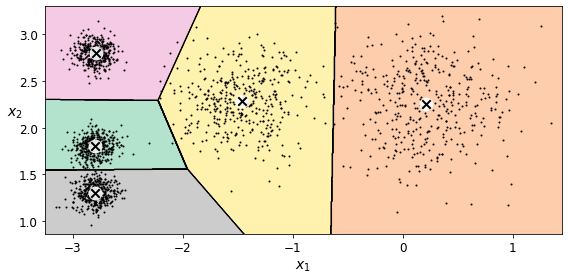

In [14]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
save_fig("voronoi_plot")
plt.show()

# The KMEANS Algorithm

The K-Means algorithm is one of the fastest clustering algorithms, and also one of the simplest:

 - First initialize  centroids randomly:  distinct instances are chosen randomly from the dataset and the centroids are placed at their locations.
 - Repeat until convergence (i.e., until the centroids stop moving):
  - Assign each instance to the closest centroid.
  - Update the centroids to be the mean of the instances that are assigned to them.

The KMeans class applies an optimized algorithm by default. To get the original K-Means algorithm (for educational purposes only), you must set init="random", n_init=1and algorithm="full". These hyperparameters will be explained below.

Let's run the K-Means algorithm for 1, 2 and 3 iterations, to see how the centroids move around:

In [ ]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=0)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=0)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=0)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)


In [ ]:

plt.figure(figsize=(10, 8))
plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

save_fig("kmeans_algorithm_plot")
plt.show()




# KMEANS Variability

In the original K-Means algorithm, the centroids are just initialized randomly, and the algorithm simply runs a single iteration to gradually improve the centroids, as we saw above.

However, one major problem with this approach is that if you run K-Means multiple times (or with different random seeds), it can converge to very different solutions, as you can see below:

In [ ]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)


In [ ]:
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=2)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=5)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1", "Solution 2 (with a different random init)")

save_fig("kmeans_variability_plot")
plt.show()


# Inertia

In [ ]:
print(kmeans.inertia_)
print(kmeans_rnd_init1.inertia_)
print(kmeans.score(X))
print(kmeans_rnd_init1.score(X))


# N_init Hyperparameter

When you set the n_init hyperparameter, Scikit-Learn runs the original algorithm n_init times, and selects the solution that minimizes the inertia. By default, Scikit-Learn sets n_init=10.

# KMeans++

Instead of initializing the centroids entirely randomly, it is preferable to initialize them using the following algorithm, proposed in <a href = "http://ilpubs.stanford.edu:8090/778/1/2006-13.pdf">a 2006 paper </a> by David Arthur and Sergei Vassilvitskii:

 - Take one centroid $c_1$, chosen uniformly at random from the dataset.
 - Take a new center $c_2$ , choosing an instance 
 with probability: 
 $D(x_i)^2 / \sum_{j = 1}^{m} D(x_j)^2$
 where $D(x_i)$
 is the distance between the instance $x_i$
 and the closest centroid that was already chosen. This probability distribution ensures that instances that are further away from already chosen centroids are much more likely be selected as centroids.
Repeat the previous step until all  centroids have been chosen.
The rest of the K-Means++ algorithm is just regular K-Means. With this initialization, the K-Means algorithm is much less likely to converge to a suboptimal solution, so it is possible to reduce n_init considerably. Most of the time, this largely compensates for the additional complexity of the initialization process.

To set the initialization to K-Means++, simply set init="k-means++" (this is actually the default):

# Accelerated KMEANS

The K-Means algorithm can be significantly accelerated by avoiding many unnecessary distance calculations: this is achieved by exploiting the triangle inequality (given three points A, B and C, the distance AC is always such that AC ≤ AB + BC) and by keeping track of lower and upper bounds for distances between instances and centroids (see this <a href = "https://www.aaai.org/Papers/ICML/2003/ICML03-022.pdf">2003 paper</a> by Charles Elkan for more details).

To use Elkan's variant of K-Means, just set algorithm="elkan". Note that it does not support sparse data, so by default, Scikit-Learn uses "elkan" for dense data, and "full" (the regular K-Means algorithm) for sparse data.

In [ ]:
%timeit -n 50 KMeans(algorithm="elkan", random_state=42).fit(X)

In [ ]:
%timeit -n 50 KMeans(algorithm="full", random_state=42).fit(X)

# Finding the Optimal number of Clusters

In [ ]:
kmeans = KMeans(random_state = 1)
skplt.cluster.plot_elbow_curve(kmeans, X, cluster_ranges=range(1, 30));
save_fig("Optimal Number of Clusters using Elbow Method")

# Silhouette Clustering

In [ ]:
from IPython.display import Image
Image(filename='purpose-of-silhouette.png') 

In [ ]:
Image(filename='Silhouette-clustering.png') 

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
kmeans = KMeans(n_clusters = 3, random_state = 1)
cluster_labels = kmeans.fit_predict(X)
skplt.metrics.plot_silhouette(X, cluster_labels);
silhouette_score(X, kmeans.labels_)


In [ ]:
kmeans = KMeans(n_clusters = 4, random_state = 1)
cluster_labels = kmeans.fit_predict(X)
skplt.metrics.plot_silhouette(X, cluster_labels);
silhouette_score(X, kmeans.labels_)

In [ ]:
kmeans = KMeans(n_clusters = 5, random_state = 1)
cluster_labels = kmeans.fit_predict(X)
skplt.metrics.plot_silhouette(X, cluster_labels);
silhouette_score(X, kmeans.labels_)

In [ ]:
kmeans = KMeans(n_clusters = 8, random_state = 1)
cluster_labels = kmeans.fit_predict(X)
skplt.metrics.plot_silhouette(X, cluster_labels);
silhouette_score(X, kmeans.labels_)

In [ ]:
clusterSize = [3, 4, 5, 6, 7, 8]
silh = []

In [ ]:
for x in clusterSize:
    kmeans = KMeans(n_clusters = x, random_state = 1)
    cluster_labels = kmeans.fit_predict(X)
    silh.append(silhouette_score(X, kmeans.labels_))
plt.figure(figsize = (8, 6))
plt.ylabel("Silhouette Score")
plt.xlabel("Cluster Size")
plt.plot(clusterSize, silh);
plt.title("Variation of Average Silhouette Score with Cluster Size")
silh.clear()
save_fig("Average Silhouette Score")